# Importing Libraries 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

# Reading data

In [71]:
dataset=pd.read_csv('netflix_titles.csv')
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Dropping Duplicates and Checking Null Values

In [72]:
dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Handling 'type' Feature

In [73]:
dataset['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

# Handling Null values in " director,cast,country"

In [74]:
li=['director','cast','country']

for feature in li:
    dataset[feature].fillna('Unavailable',inplace=True)

dataset[li].head()

,director,cast,country
0,Kirsten Johnson,Unavailable,United States
1,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable
3,Unavailable,Unavailable,Unavailable
4,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India


# Handling country Feature

In [75]:
cnty=dataset['country'].value_counts()
cntyl50=cnty[cnty<50]
cntyl50

United States, United Kingdom             47
Italy                                     45
Canada, United States                     45
Colombia                                  35
South Africa                              30
                                          ..
Romania, Bulgaria, Hungary                 1
Uruguay, Guatemala                         1
France, Senegal, Belgium                   1
Mexico, United States, Spain, Colombia     1
United Arab Emirates, Jordan               1
Name: country, Length: 724, dtype: int64

In [76]:
def cntry(value):
    if value in cntyl50:
        return 'rare'
    else:
        return value
    
dataset['country']=dataset['country'].apply(cntry)


# Handling Date_added feature

In [77]:

dataset['date_added']=pd.to_datetime(dataset['date_added'])

dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",rare,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Handling rating feature

In [78]:
dataset['rating'].fillna('TV-MA',inplace=True)
rating=dataset['rating'].value_counts()
ratingl41=rating[rating<41]

In [79]:
def rating1(value):
    if(value in ratingl41):
        return 'rare'
    else:
        return value
    
dataset['rating']=dataset['rating'].apply(rating1)

dataset['rating'].value_counts()





TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
rare       15
Name: rating, dtype: int64

In [80]:
dff=dataset.groupby(['type','duration'])['type'].count()
dff=dff.to_frame()
dff

type
type    duration       
Movie   10 min        1
        100 min     108
        101 min     116
        102 min     122
        103 min     114
...                 ...
TV Show 5 Seasons    65
        6 Seasons    33
        7 Seasons    23
        8 Seasons    17
        9 Seasons     9

[220 rows x 1 columns]

# Viewing Top listed_in feature

In [81]:
dataset['listed_in'].value_counts()[:20]

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

# Visualization

# Type vs Count

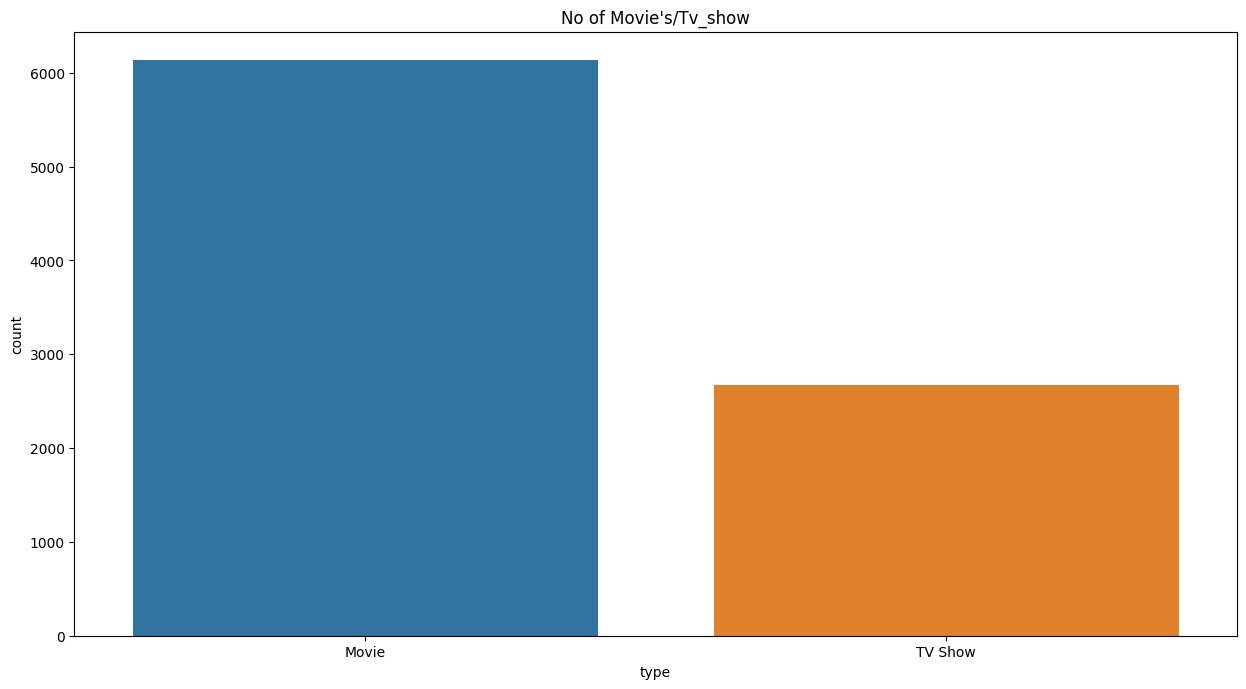

In [82]:
plt.figure(figsize=(15,8),dpi=100)
sns.countplot(x='type',data=dataset)
plt.title("No of Movie's/Tv_show")
plt.savefig('movie-tvshow.jpg')

# Country wise Count (netflix content)


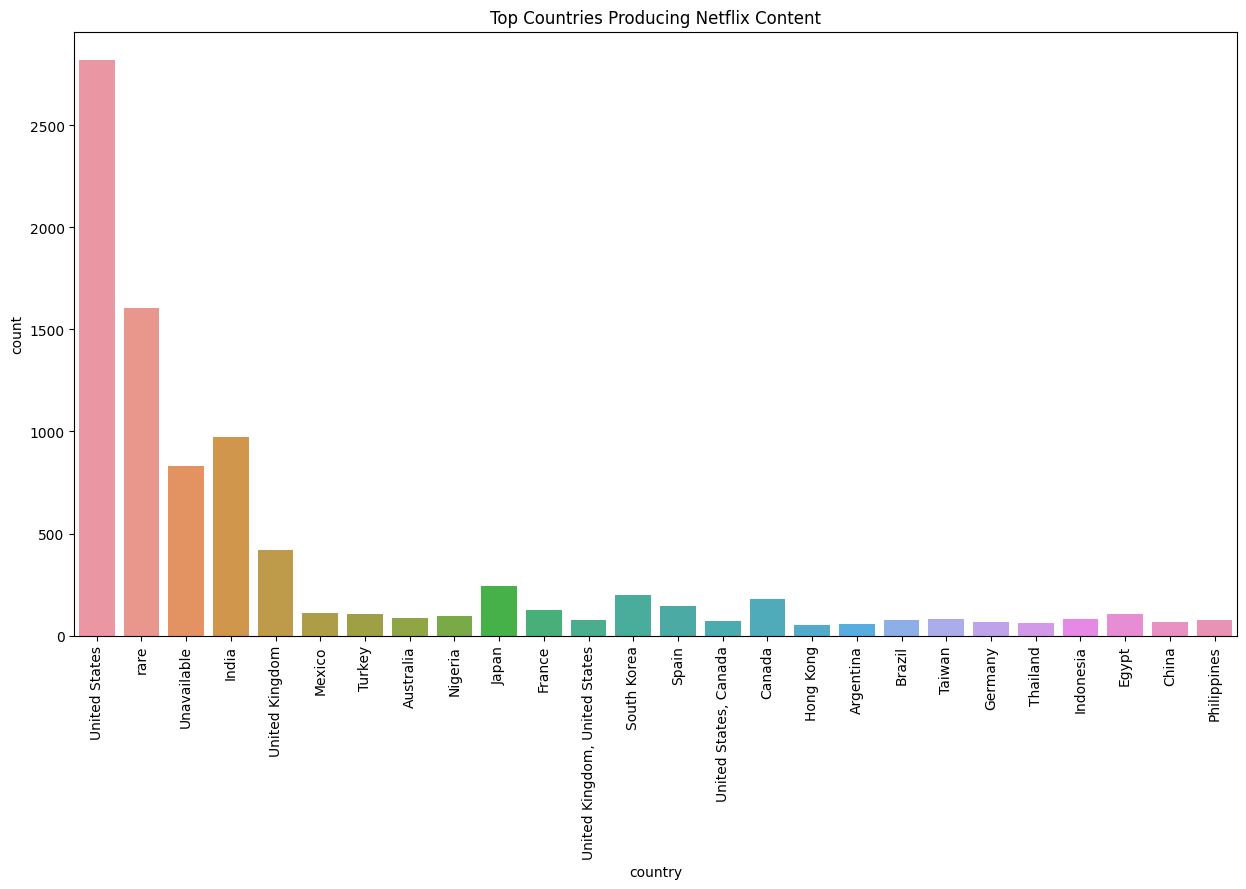

In [83]:
plt.figure(figsize=(15,8),dpi=100)
sns.countplot(x='country',data=dataset)
plt.xticks(rotation=90)
plt.title('Top Countries Producing Netflix Content')
plt.savefig('country-count.jpg',bbox_inches='tight')

# Directors with more netflix content

In [84]:
df1=dataset['director'].value_counts()[:35]
df1=df1.to_frame()
df1.drop('Unavailable',inplace=True)
df1

,director
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12
Steven Spielberg,11


# director vs count ( top directors acc to numbers)

C:\Users\lokes\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


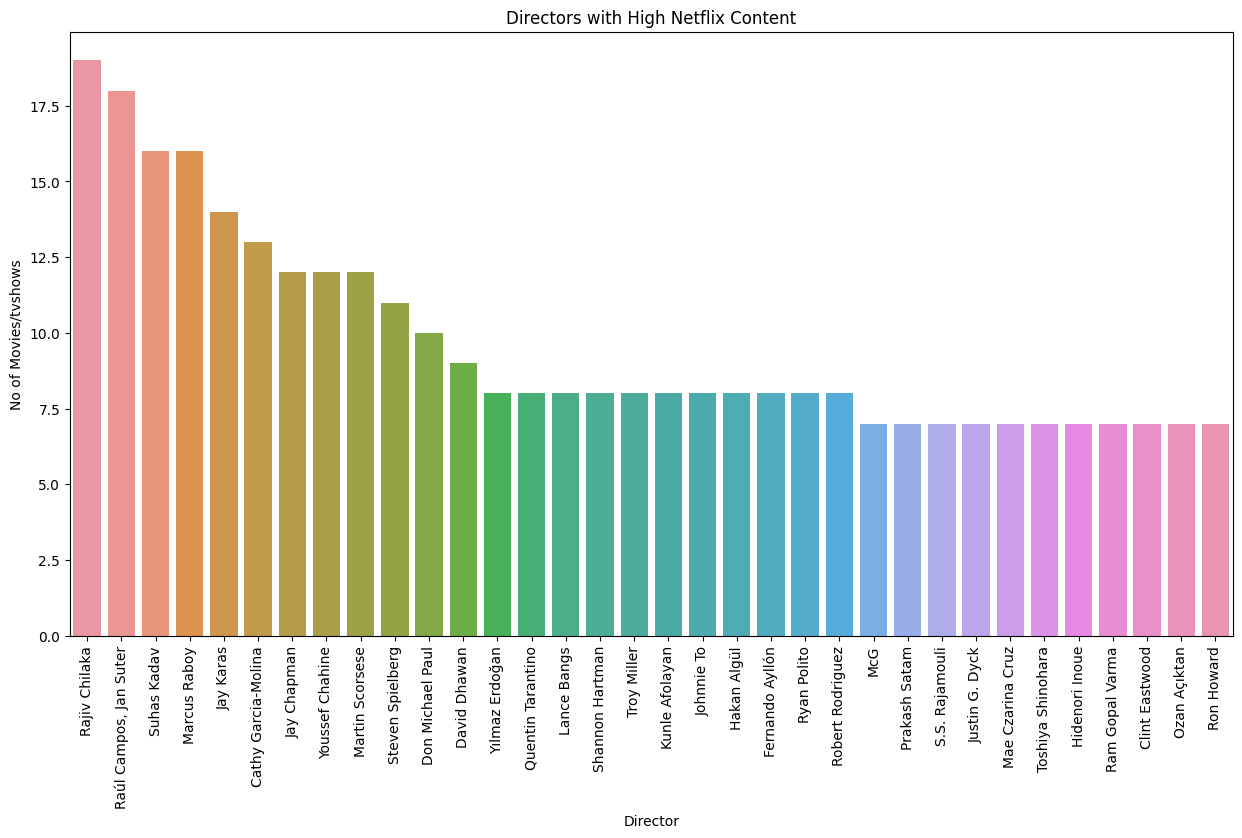

In [85]:
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(df1.index,df1.director)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('No of Movies/tvshows')
plt.title('Directors with High Netflix Content')
plt.savefig('top-directors.jpg',bbox_inches='tight')

# Country wise Movie vs Tv show count

In [86]:
df2=dataset.groupby(['country','type'])['show_id'].count()
df2=df2.to_frame()
df3=df2.pivot_table(index='country',columns='type')
df3.drop('rare',inplace=True)
df3

show_id        
type                            Movie TV Show
country                                      
Argentina                          38      18
Australia                          39      48
Brazil                             50      27
Canada                            122      59
China                              28      38
Egypt                              92      14
France                             75      49
Germany                            47      20
Hong Kong                          50       3
India                             893      79
Indonesia                          77       2
Japan                              76     169
Mexico                             70      40
Nigeria                            86       9
Philippines                        73       2
South Korea                        41     158
Spain                              97      48
Taiwan                             13      68
Thailand                           37      24
Turkey                             76      29
Unavailable                       440     391
United Kingdom                    206     213
United Kingdom, United States      63      12
United States                    2058     760
United States, Canada              51      22

# country vs Type(movie and Tv show)

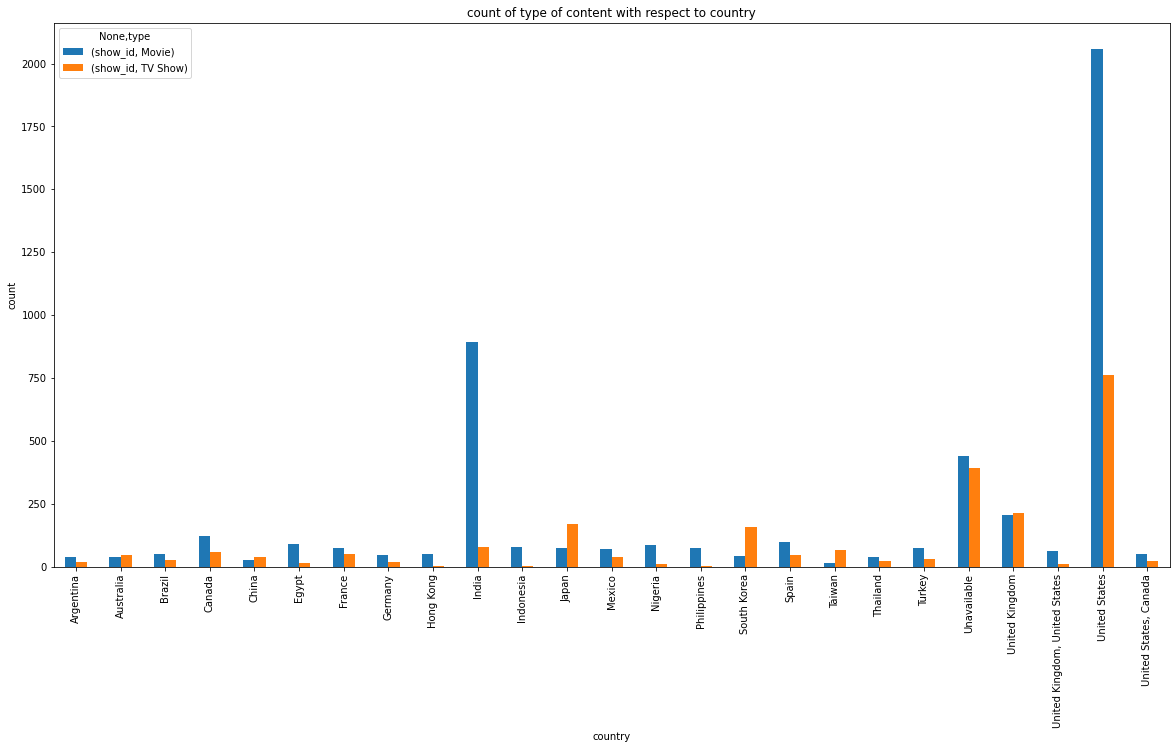

In [87]:
df3.plot.bar(figsize=(20,10))
plt.ylabel('count')
plt.title('count of type of content with respect to country')
plt.savefig('country-type.jpg',bbox_inches='tight')

#  Rating withrespect to type

In [88]:
df4=dataset.groupby(['rating','type'])['show_id'].count()
df4=df4.to_frame()
df5=df4.pivot_table(index='rating',columns='type',fill_value=0)
df5

show_id        
type     Movie TV Show
rating                
G           41       0
NR          75       5
PG         287       0
PG-13      490       0
R          797       2
TV-14     1427     733
TV-G       126      94
TV-MA     2064    1147
TV-PG      540     323
TV-Y       131     176
TV-Y7      139     195
rare        14       1

# Rating count vs Type(Movie,Tv show)

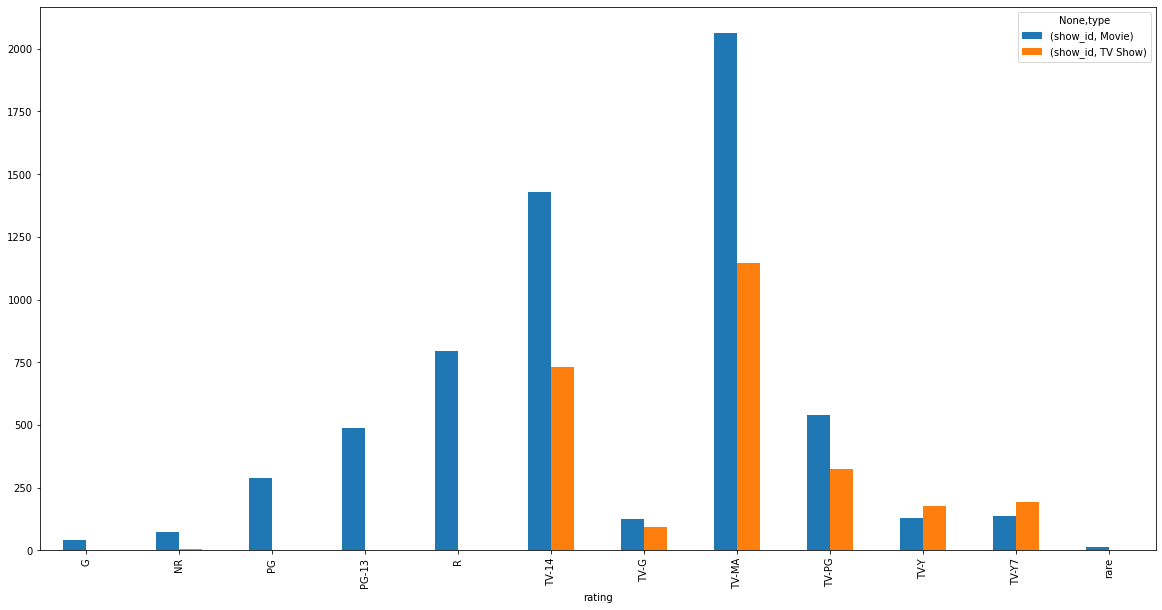

In [89]:
df5.plot.bar(figsize=(20,10))
plt.savefig('Rating-type.jpg')

# Top Listed_in Netflix

In [90]:
df6=dataset['listed_in'].value_counts()[:20]
df6=df6.to_frame()
df6

,listed_in
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186
"Dramas, International Movies, Romantic Movies",180


# Count of top Listed_in (Top 20 Genre)

C:\Users\lokes\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


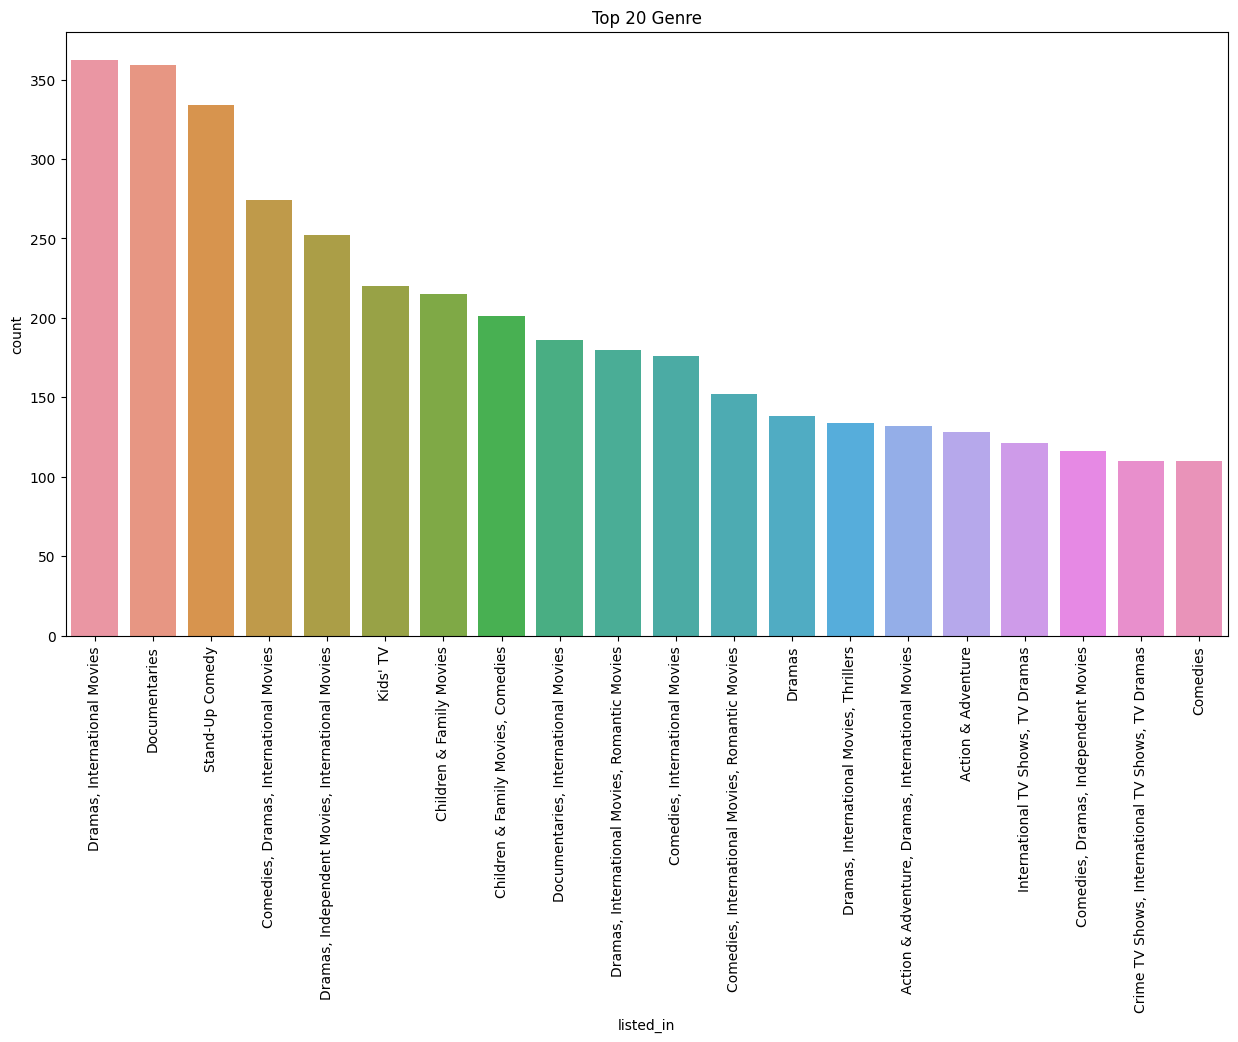

In [91]:
plt.figure(figsize=(15,8),dpi=100)
sns.barplot(df6.index,df6.listed_in)
plt.xticks(rotation=90)
plt.xlabel('listed_in')
plt.ylabel('count')
plt.title('Top 20 Genre')
plt.savefig('genre.jpg',bbox_inches='tight')

# Movie/tv_show released with respect to year

In [92]:
df7=dataset.groupby(['release_year','type'])['show_id'].count()
df7=df7.to_frame()
df8=df7.pivot_table(index='release_year',columns='type',fill_value=0)
df8

show_id        
type           Movie TV Show
release_year                
1925               0       1
1942               2       0
1943               3       0
1944               3       0
1945               3       1
...              ...     ...
2017             767     265
2018             767     380
2019             633     397
2020             517     436
2021             277     315

[74 rows x 2 columns]

# NO of Movies/tv_shows released  v year

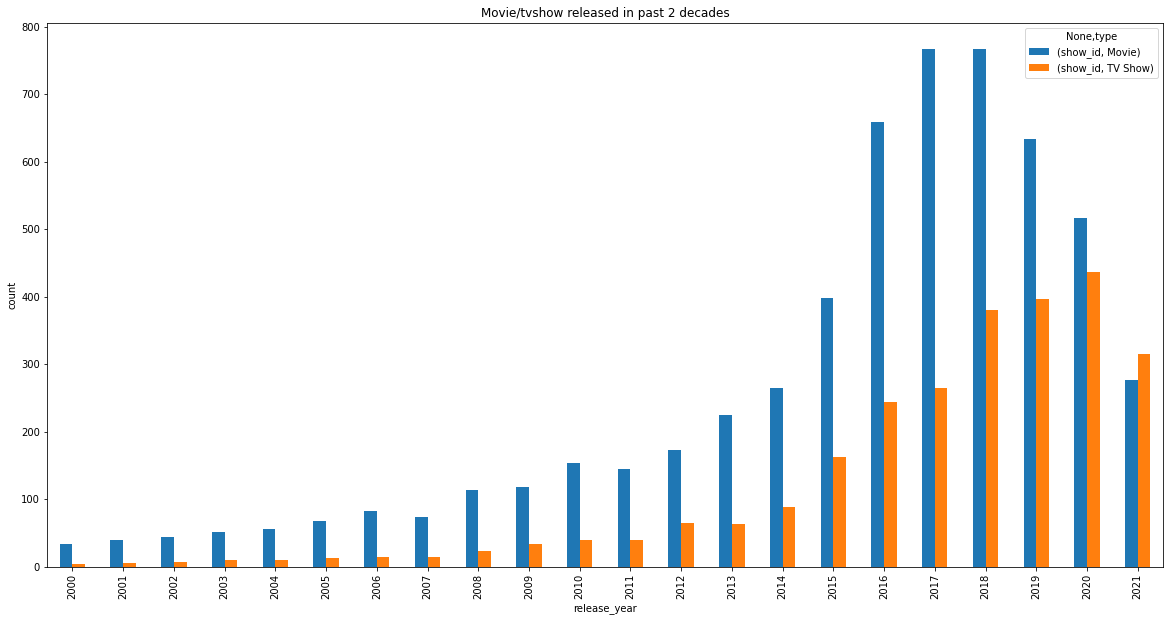

In [93]:
df8[52:].plot.bar(figsize=(20,10))
plt.title('Movie/tvshow released in past 2 decades')
plt.ylabel('count')
plt.savefig('year released.jpg')